In [1]:
import cv2 
import numpy as np 
from scipy import optimize
import matplotlib.pyplot as plt
import math
from IPython.display import Image


Import the necessary packages required to run this script

In [2]:
cap = cv2.VideoCapture('Perfusion.mov')
refPt = []
intensity_arr = []
time = []

Creates variables which are used in the execution of the script. 
cap: VideoCapture object which contains the information stored in the movie. 
refPt: List of points that define the region of interest
intensity_arr: List that contains the resulting intensity of each frame as defined by the region of interest

In [3]:
def get_intensity(image):
    sum = 0
    for x in image:
        sum += x
    return sum

A function to get the intensity from a region or image. 


![title](ImageJIntensityVerification.png)
![title](ProgramIntesityVerification.png) 

This validates the function which gets the intensity from a particular region using ImageJ. Using both of these programs, the intensity returned over the same area is the same. In ImageJ, the area multiplied by the average intensity gives the same result as get_intensity function above. 

In [4]:
def get_total_possible(img):
    sum = 0
    for x in img:
        sum += 255
    print(sum)
    return sum

A function to get the total possible intensity of a region or image, assuming that the total possible is the amount of white signal coming back, i.e. a value of 255 for each pixel. 

In [5]:
def get_area(img): 
    area = 0 
    for x in img: 
        area += 1
    return area

In [6]:
def define_roi(cap):

    def create_vert(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(frame, (x, y), 1, (0, 255, 0), 1)
            refPt.append((x, y))
        if event == cv2.EVENT_LBUTTONUP:
            if len(refPt) > 1:
                cv2.line(frame, refPt[len(refPt) - 2], refPt[len(refPt) - 1], (0, 255, 0), 1)

    cap.set(1, 1)
    ret, frame = cap.read()
    cv2.imshow('image', frame)
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', create_vert)

    while 1:
        cv2.imshow('image', frame)
        if cv2.waitKey(20) & 0xFF == 27:
            break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    vertices = np.asarray(refPt)
    mask = np.zeros((frame.shape[0], frame.shape[1]))
    cv2.fillConvexPoly(mask, vertices, 1)
    mask = mask.astype(np.bool)
    cap.release
    cv2.destroyAllWindows()
    return mask

A function for user input to define the region of interest. 

Create_vert is a helper function used to get mouse-input in OpenCV, where each click stores the vertex of the polygon approximation used to define the ROI, and draws lines between the points to make viewing easier. 

define_roi opens up the first frame for the user, and creates a masked image which contains information about which pixels the script should look at for each frame. The function then returns the mask. 

When using the function, the ROI defined is inclusive of the points that constitute the border of the ROI, making it appear as if the area is larger than a similar ROI defined in a program such as ImageJ. This does not affect the actual data collection which yields the same values for a similarly defined area. 



In [7]:
if (cap.isOpened() == False):
    print("Error opening video stream or file")

Checks to see if the video file has been opened successfully. If not, prints the error to the console. 

In [8]:
mask = define_roi(cap)

Calls the define_roi function and saves the resulting masked image to a variable called mask. Mask will then be applied to each frame in the movie. 

In [9]:
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Frame', frame)
        cv2.namedWindow('Frame')
        intensity = get_intensity(frame[mask])
        intensity_arr.append(intensity)
        time.append(cap.get(5))

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break

Loops over the frames and finds the intensity coming from the region in each frame. Stores the intensities in a list. 

In [10]:
# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

[ 4.93009901  0.34134296] [[ 0.00301422 -0.01507112]
 [-0.01507112  0.10256731]]


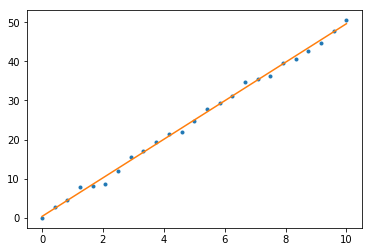

In [11]:
x = np.linspace(0, 10, num=25)
y = 5 * x + np.random.normal(size=25)

def lin_func(x, m, b): 
    return m*x + b 
# Fit with polyfit
params, params_covariance = optimize.curve_fit(lin_func, x, y, p0=[5, 10])
print(params, params_covariance)
plt.plot(x, y, '.')
plt.plot(x, lin_func(x, params[0], params[1]), '-')
plt.show()

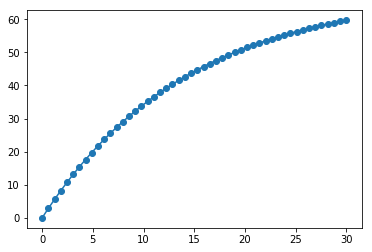

In [12]:
def exp_func(x, a, b): 
    return a*(1-np.exp(-b*x))

x = np.linspace(0, 30, num=50)
y = 68*(1-np.exp(-0.07*x)) 
plt.scatter(x, y)
params, params_covariance = optimize.curve_fit(exp_func, x, y, p0=[60, 1])
plt.plot(x, exp_func(x, params[0], params[1]))

In [ ]:
def find_min_index(arr): 
    index = 0
    
    for x in arr: 
        

[ 173.41808294    1.01217814]


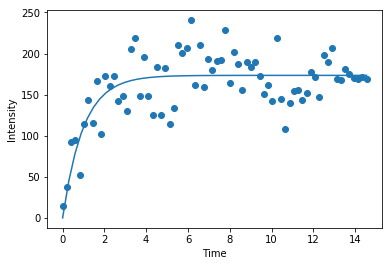

In [13]:
area = get_area(mask)
background = intensity_arr[5]
destruction_arr = [x - background for x in intensity_arr[6:]]
x = [x for x in range(len(destruction_arr))]
x = np.array([x / time[x] for x in x])
y = np.array([x/area for x in destruction_arr])
time_x = np.linspace(0, x[x.size-1], num=50)


def intensity_func(x, a, b): 
    return a*(1-np.exp(-(b*x)))

params, params_covariance = optimize.curve_fit(intensity_func, x, y, p0=[50, 1])
print(params)

plt.scatter(x, y)
plt.ylabel("Intensity")
plt.xlabel("Time")
plt.plot(time_x, intensity_func(time_x, params[0], params[1]), label='Fitted function')
plt.show()

Creates a plot over the intensities with the frame numbers as the x axis and gives a regression line. 